## Outline for single Layer, single Neuron Classifier
1. Initalize the learnable parameters
2. Implement Forward Propagation - Linear(Sigmoid)
3. Calculate the cost
4. Implement Back Propagation
5. Start main loop

In [1]:
# importing stuff
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initializer(num_inp_features):
    # initializing learnable parameters

    W = np.random.randn(1,num_inp_features) * 0.01 #can be zero since there is only one neuron
    b = 0
    
    return W,b

In [3]:
def forward_prop(X,W,b):
    # implementing forward propagation
    
    Z = np.dot(W,X) + b
    A = 1/(1+np.exp(-1*Z))
    
    return Z,A

In [4]:
def compute_cost(A,Y):
    # calculating cost
    
    cost = (-1/Y.shape[1])*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1,keepdims=True)
    
    return cost

In [5]:
def back_prop(X,A,Y):
    # implementing back propagation
    
    dW = (1/Y.shape[1])*np.dot(A-Y,X.T)
    db = (1/Y.shape[1])*np.sum(A-Y,axis=1,keepdims=True)
    
    return dW,db

In [6]:
def start_training(X,Y,max_iter,learning_rate=0.01):
    # starts training loop
    
    global costs
    costs = []
    
    W,b = initializer(X.shape[0])
    for i in range(max_iter):
        Z,A = forward_prop(X,W,b)
        cost = compute_cost(A,Y)
        costs.append(cost.reshape(1))
        dW,db = back_prop(X,A,Y)
        
        W = W - learning_rate*dW
        b = b - learning_rate*db
        
        if(i%100 == 0):
            print('Cost after '+str(i)+' iterations = '+str(cost))
    
    plt.plot(costs)
    plt.ylim(0,1)
    plt.ylabel('Cost')
    plt.xlabel('Num Iterations')
    return W,b

Cost after 0 iterations = [[0.6946953]]
Cost after 100 iterations = [[0.47185797]]
Cost after 200 iterations = [[0.38801126]]
Cost after 300 iterations = [[0.35093326]]
Cost after 400 iterations = [[0.33236207]]
Cost after 500 iterations = [[0.32221766]]
Cost after 600 iterations = [[0.3163257]]
Cost after 700 iterations = [[0.31274603]]
Cost after 800 iterations = [[0.31049504]]
Cost after 900 iterations = [[0.30904004]]
Cost after 1000 iterations = [[0.3080775]]


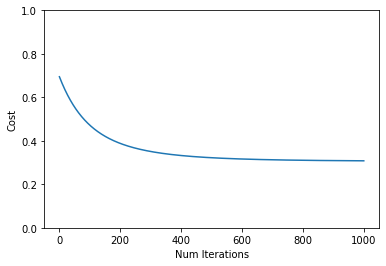

In [44]:
# making testing dataset
X = np.random.rand(5,64)
Y = np.random.rand(1,64) > 0.9
Y = Y.astype(int)
trained_W,trained_b = start_training(X,Y,1001)

In [45]:
_ , A = forward_prop(X,trained_W,trained_b)
A = (A > 0.5).astype(int)
predictions = (A == Y).astype(int)
accuracy = np.sum(predictions)/predictions.shape[1]
print(accuracy)

0.90625


## Outline for Single Layer(actually two), multiple Neuron classifier
1. Initializer learnable parameters
2. Implement Forward propagation - Linear(Sigmoid)
3. Calculate the cost
4. Implement Back propagation
5. Start Main Loop  

### Run separately from above code after restarting kernel to prevent variable mismatch

In [372]:
# importing stuff
import numpy as np
import matplotlib.pyplot as plt

In [373]:
def initializer(num_neurons,num_inp_features):
    # initializing learnable parameters

    W1 = np.random.randn(num_neurons,num_inp_features) * 0.01
    b1 = np.zeros((num_neurons,1))
    W2 = np.random.randn(1,num_neurons) * 0.01
    b2 = 0
    
    return W1,b1,W2,b2

In [374]:
def forward_prop(X,W1,b1,W2,b2):
    # implementing forward propagation
    
    Z1 = np.dot(W1,X) + b1
    A1 = 1/(1+np.exp(-1*Z1))
    Z2 = np.dot(W2,A1) + b2
    A2 = 1/(1+np.exp(-1*Z2))
    
    return Z1,A1,Z2,A2

In [375]:
def compute_cost(A2,Y):
    # calculating cost
    
    cost = (-1/Y.shape[1])*np.sum(Y*np.log(A2)+(1-Y)*np.log(1-A2),axis=1,keepdims=True)
    
    return cost

In [376]:
def back_prop(X,A1,A2,Y,W2):
    # implementing back propagation
    
    m = Y.shape[1]
    dZ2 = A2-Y
    dZ1 = np.dot(W2.T,dZ2)*((A1-1)*A1)
    dW1 = (1/m) * np.dot(dZ1,X.T)
    db1 = (1/m) * np.sum(dZ1,axis=1,keepdims=True)
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * np.sum(dZ2,axis=1,keepdims=True)
    
    return dW1,db1,dW2,db2

In [377]:
def start_training(X,Y,max_iter,learning_rate=0.01):
    # starts training loop
    
    global costs
    costs = []
    
    W1,b1,W2,b2 = initializer(3,X.shape[0])
    for i in range(max_iter):
        Z1,A1,Z2,A2 = forward_prop(X,W1,b1,W2,b2)
        cost = compute_cost(A2,Y)
        costs.append(cost.reshape(1))
        dW1,db1,dW2,db2 = back_prop(X,A1,A2,Y,W2)
        
        W1 = W1 - learning_rate*dW1
        b1 = b1 - learning_rate*db1
        W2 = W2 - learning_rate*dW2
        b2 = b2 - learning_rate*db2
        
        if(i%10 == 0):
            print('Cost after '+str(i)+' iterations = '+str(cost))
    
    plt.plot(costs)
    plt.ylim(0,1)
    plt.ylabel('Cost')
    plt.xlabel('Num Iterations')
    return W1,b1,W2,b2

Cost after 0 iterations = [[0.69611739]]
Cost after 10 iterations = [[0.69341639]]
Cost after 20 iterations = [[0.69073904]]
Cost after 30 iterations = [[0.68808516]]
Cost after 40 iterations = [[0.68545455]]
Cost after 50 iterations = [[0.682847]]
Cost after 60 iterations = [[0.68026232]]
Cost after 70 iterations = [[0.67770033]]
Cost after 80 iterations = [[0.67516082]]
Cost after 90 iterations = [[0.67264361]]
Cost after 100 iterations = [[0.6701485]]
Cost after 110 iterations = [[0.6676753]]
Cost after 120 iterations = [[0.66522383]]
Cost after 130 iterations = [[0.66279389]]
Cost after 140 iterations = [[0.66038529]]
Cost after 150 iterations = [[0.65799786]]
Cost after 160 iterations = [[0.6556314]]
Cost after 170 iterations = [[0.65328574]]
Cost after 180 iterations = [[0.65096068]]
Cost after 190 iterations = [[0.64865604]]
Cost after 200 iterations = [[0.64637166]]
Cost after 210 iterations = [[0.64410733]]
Cost after 220 iterations = [[0.64186289]]
Cost after 230 iterations =

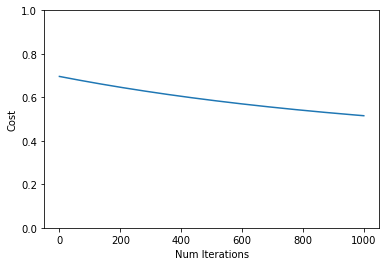

In [64]:
# making testing dataset
X = np.random.rand(5,64)
Y = np.random.rand(1,64) > 0.9
Y = Y.astype(int)
trained_W1,trained_b1,trained_W2,trained_b2 = start_training(X,Y,1000)

In [65]:
_ , _ , _ , A = forward_prop(X,trained_W1,trained_b1,trained_W2,trained_b2)
A = (A > 0.5).astype(int)
predictions = (A == Y).astype(int)
accuracy = np.sum(predictions)/predictions.shape[1]
print(accuracy)

0.890625


# Multilayer Network

In [547]:
# importing stuff
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [548]:
def tanh(x):
    return (np.exp(2*x)-1)/(np.exp(2*x)+1)

In [549]:
def initializer(layers_info,X):
    parameters = {}
    layers_info.insert(0,X.shape[0])
    for i in range(1,len(layers_info)):
        parameters['W'+str(i)] = np.random.randn(layers_info[i],layers_info[i-1]) * 0.01
        parameters['b'+str(i)] = np.zeros((layers_info[i],1))
    return parameters,layers_info

In [550]:
def forward_prop(parameters,X,layers_info):
    logits = {}
    activations = {}
    activations['A0'] = X
    for i in range(1,len(layers_info)-1):
        logits['Z'+str(i)] = np.dot(parameters['W'+str(i)],activations['A'+str(i-1)]) + parameters['b'+str(i)]
        activations['A'+str(i)] = tanh(logits['Z'+str(i)])
        
    logits['Z'+str(len(layers_info)-1)] = np.dot(parameters['W'+str(len(layers_info)-1)],activations['A'+str(len(layers_info)-1-1)]) + parameters['b'+str(len(layers_info)-1)]
    activations['A'+str(len(layers_info)-1)] = 1/(1+np.exp(-logits['Z'+str(len(layers_info)-1)]))
    #print(activations['A'+str(len(layers_info)-1)])
    
    return logits,activations

In [551]:
def compute_cost(activations,Y,layers_info):
    AL = activations['A'+str(len(layers_info)-1)]
    cost = (-1/Y.shape[1])*np.sum(Y*np.log(AL) + (1-Y)*np.log(AL))
    return cost

In [552]:
def back_prop(X,Y,parameters,activations,layers_info,logits):
    gradients = {}
    m = Y.shape[1]
    gradients['dZ'+str(len(layers_info)-1)] = activations['A'+str(len(layers_info)-1)] - Y
    gradients['dW'+str(len(layers_info)-1)] = (1/m) * np.dot(gradients['dZ'+str(len(layers_info)-1)],activations['A'+str(len(layers_info)-2)].T)
    gradients['db'+str(len(layers_info)-1)] = (1/m) * np.sum(gradients['dZ'+str(len(layers_info)-1)],axis=1,keepdims=True)
    for i in range(2,len(layers_info)):
        gradients['dZ'+str(len(layers_info) - i)] = np.dot(parameters['W'+str(len(layers_info)-i+1)].T,gradients['dZ'+str(len(layers_info)-i+1)])*(1-np.square(tanh(logits['Z'+str(len(layers_info)-i)])))
        gradients['dW'+str(len(layers_info)-i)] = (1/m) * np.dot(gradients['dZ'+str(len(layers_info)-i)],activations['A'+str(len(layers_info)-i-1)].T)
        gradients['db'+str(len(layers_info)-i)] = (1/m) * np.sum(gradients['dZ'+str(len(layers_info)-i)],axis=1,keepdims=True)
    return gradients

In [553]:
def start_training(X,Y,layers_info,max_iter,learning_rate=0.001):
    parameters,layers_info = initializer(layers_info,X)
    
    global costs
    costs = []
    
    for j in range(max_iter):
        logits,activations = forward_prop(parameters,X,layers_info)
        #for j in logits.keys():
        #    print(j)
        cost = compute_cost(activations,Y,layers_info)
        costs.append(cost)
        gradients = back_prop(X,Y,parameters,activations,layers_info,logits)
        for i in range(1,len(layers_info)):
            parameters['W'+str(i)] -= learning_rate*gradients['dW'+str(i)]
            parameters['b'+str(i)] -= learning_rate*gradients['db'+str(i)]
            
        if(j%1000 == 0):
            print(cost)
            
    plt.plot(costs)
    plt.ylim(0,1)
    plt.ylabel('Cost')
    plt.xlabel('Num Iterations')
    return parameters

In [554]:
import pandas as pd
df = pd.read_csv('datasets/Titanic/train.csv')
df.dropna(inplace=True)
def convert_for_use(dataframe):
    tempdf = dataframe.drop(labels=['Name','Ticket','Cabin'],axis=1).set_index('PassengerId')
    tempdf.replace({'male':0,'female':1,'S':0,'C':1,'Q':2},inplace=True);
    X = tempdf.iloc[:,1:]
    y = tempdf.iloc[:,0]
    return (X,y)

In [555]:
X,Y = convert_for_use(df)
Y = Y.to_numpy(dtype=np.float64)
X = X.to_numpy(dtype=np.float64)
X = X.T
Y = Y.reshape(1,183)

123
0.6929654107749615
0.619463054791888
0.5661712699570859
0.526891282511775
0.497519363566054
0.4752876431687593
0.4582999364623785
0.4452451711084058
0.43519806231782493
0.4273687704508231


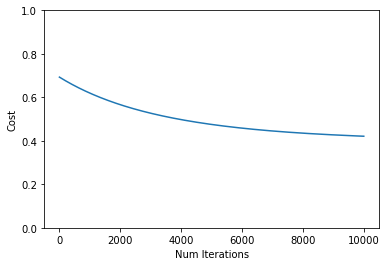

In [560]:
#Y = (Y != 1).astype(float)
print(np.count_nonzero(Y == 1))
layers_info = [2,7,1]
trained_parameters = start_training(X,Y,layers_info,10000)

In [561]:
_ , activations = forward_prop(trained_parameters,X,layers_info)
A = activations['A'+str(len(layers_info)-1)]
print(A)
A = (A > 0.5).astype(int)
print(A)
predictions = (A == Y).astype(int)
accuracy = np.sum(predictions)/predictions.shape[1]
print(accuracy)

[[0.65703914 0.65634836 0.6550013  0.65634178 0.65379991 0.65426907
  0.6558002  0.65817317 0.65671158 0.65487407 0.65718888 0.65440728
  0.65447854 0.65817315 0.65608505 0.65363867 0.65737609 0.65775801
  0.65546545 0.65817302 0.65433921 0.65643587 0.65591413 0.65622344
  0.65772387 0.65475035 0.65750427 0.65389415 0.65398905 0.6541616
  0.65744181 0.65686783 0.6544029  0.65803468 0.65610134 0.65477632
  0.65802818 0.65743484 0.65761715 0.65754523 0.6574554  0.65621169
  0.65443181 0.653689   0.65772678 0.65669728 0.65367376 0.65807271
  0.65810539 0.65490744 0.65590247 0.65796643 0.65417627 0.65816776
  0.65817231 0.65816807 0.65808823 0.6568051  0.65779178 0.65817318
  0.65815899 0.65808423 0.65810196 0.65417756 0.65745858 0.65436008
  0.65813818 0.65725687 0.65807582 0.65470519 0.65691897 0.65817315
  0.65480009 0.65712804 0.65595205 0.65750144 0.65701799 0.65817186
  0.65803775 0.65807752 0.65501429 0.65773782 0.65416019 0.65528985
  0.65551692 0.65813037 0.65817234 0.65803134 0.6

## NN on MNIST Dataset (without CNN)

In [692]:
import numpy as np
import matplotlib.pyplot as plt
import struct
with open('datasets/Hdigits_train.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, nrows, ncols))
X = data
with open('datasets/Hdigits_train_labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
Y_raw = data
X = X/255
X = X.reshape(X.shape[0],-1)
X = X.T

In [661]:
Y_raw = Y_raw.reshape(1,60000)
print(Y_raw.shape)
Y_hot = np.zeros((10,60000))
for i in range(60000):
    Y_hot[Y_raw[0,i],i] = 1
print(Y_raw[0,2])
print(Y_hot[:,2])
Y = Y_hot

(1, 60000)
4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [662]:
def rev_one_hot(a):
    b = np.zeros((1,a.shape[1]))
    for i in range(a.shape[1]):
        for j in range(a.shape[0]):
            if(a[j,i] == 1):
                b[0,i] = j
                break
    return b

In [663]:
def initializer(layers_info,X):
    parameters = {}
    layers_info.insert(0,X.shape[0])
    for i in range(1,len(layers_info)):
        parameters['W'+str(i)] = np.random.randn(layers_info[i],layers_info[i-1]) * 0.01
        parameters['b'+str(i)] = np.zeros((layers_info[i],1))
    return parameters,layers_info

In [664]:
def forward_prop(parameters,X,layers_info):
    logits = {}
    activations = {}
    activations['A0'] = X
    for i in range(1,len(layers_info)-1):
        logits['Z'+str(i)] = np.dot(parameters['W'+str(i)],activations['A'+str(i-1)]) + parameters['b'+str(i)]
        activations['A'+str(i)] = tanh(logits['Z'+str(i)])
        
    logits['Z'+str(len(layers_info)-1)] = np.dot(parameters['W'+str(len(layers_info)-1)],activations['A'+str(len(layers_info)-1-1)]) + parameters['b'+str(len(layers_info)-1)]
    activations['A'+str(len(layers_info)-1)] = np.exp(logits['Z'+str(len(layers_info)-1)])/np.sum(np.exp(logits['Z'+str(len(layers_info)-1)]),axis=0,keepdims=True)
    #print(activations['A'+str(len(layers_info)-1)])
    
    return logits,activations

In [665]:
def compute_cost(activations,Y,layers_info):
    AL = activations['A'+str(len(layers_info)-1)]
    cost = (-1/Y.shape[1])*np.sum(Y*np.log(AL))  # + (1-Y)*np.log(AL))
    return cost

In [666]:
def back_prop(X,Y,parameters,activations,layers_info,logits):
    gradients = {}
    m = Y.shape[1]
    gradients['dZ'+str(len(layers_info)-1)] = activations['A'+str(len(layers_info)-1)] - Y
    gradients['dW'+str(len(layers_info)-1)] = (1/m) * np.dot(gradients['dZ'+str(len(layers_info)-1)],activations['A'+str(len(layers_info)-2)].T)
    gradients['db'+str(len(layers_info)-1)] = (1/m) * np.sum(gradients['dZ'+str(len(layers_info)-1)],axis=1,keepdims=True)
    for i in range(2,len(layers_info)):
        gradients['dZ'+str(len(layers_info) - i)] = np.dot(parameters['W'+str(len(layers_info)-i+1)].T,gradients['dZ'+str(len(layers_info)-i+1)])*(1-np.square(tanh(logits['Z'+str(len(layers_info)-i)])))
        gradients['dW'+str(len(layers_info)-i)] = (1/m) * np.dot(gradients['dZ'+str(len(layers_info)-i)],activations['A'+str(len(layers_info)-i-1)].T)
        gradients['db'+str(len(layers_info)-i)] = (1/m) * np.sum(gradients['dZ'+str(len(layers_info)-i)],axis=1,keepdims=True)
    return gradients

In [687]:
def start_training(X,Y,layers_info,max_iter,learning_rate=0.01):
    parameters,layers_info = initializer(layers_info,X)
    
    global costs
    costs = []
    
    for j in range(max_iter):
        logits,activations = forward_prop(parameters,X,layers_info)
        #for j in logits.keys():
        #    print(j)
        cost = compute_cost(activations,Y,layers_info)
        costs.append(cost)
        gradients = back_prop(X,Y,parameters,activations,layers_info,logits)
        for i in range(1,len(layers_info)):
            parameters['W'+str(i)] -= learning_rate*gradients['dW'+str(i)]
            parameters['b'+str(i)] -= learning_rate*gradients['db'+str(i)]
            
        if(j%100 == 0):
            print(cost)
            
    plt.plot(costs)
    #plt.ylim(0,5)
    plt.ylabel('Cost')
    plt.xlabel('Num Iterations')
    return parameters

2.3025862202585787
2.302305284155788
2.3020718818232284
2.301877259736645
2.3017141719916414
2.3015766169249927
2.3014596160963263
2.30135902867405
2.3012713952849717
2.301193806195296


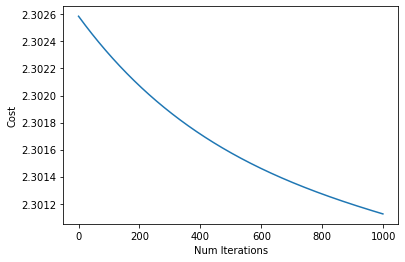

In [731]:
layers_info = [30,20,10]
trained_parameters = start_training(X,Y,layers_info,1000)

In [726]:
_ , activations = forward_prop(trained_parameters,X,layers_info)
A = activations['A'+str(len(layers_info)-1)]
#print(A.shape)
print(A[:,5])
for i in range(60000):
    A[:,i] = (A[:,i] == np.max(A[:,i])).astype(float)
print(A[:,3])
print(Y[:,3])
rev_hotted_A = rev_one_hot(A)

[0.06664208 0.04820069 0.14340768 0.06726686 0.14221587 0.07351697
 0.16993936 0.08238234 0.09582182 0.11060633]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [727]:
predictions = (rev_hotted_A == Y_raw).astype(int)
print(predictions)
accuracy = np.sum(predictions)/predictions.shape[1]
print(accuracy)

[[0 1 1 ... 1 0 0]]
0.6278333333333334


In [728]:
with open('datasets/Hdigits_test.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, nrows, ncols))
X_test = data
with open('datasets/Hdigit_test_labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
Y_test = data
X_test = X_test/255
X_test = X_test.reshape(X_test.shape[0],-1)
X_test = X_test.T
Y_test = Y_test.reshape(1,Y_test.shape[0])

In [729]:
_ , activations = forward_prop(trained_parameters,X_test,layers_info)
A = activations['A'+str(len(layers_info)-1)]
print(A)
for i in range(A.shape[1]):
    A[:,i] = (A[:,i] == np.max(A[:,i])).astype(float)
rev_hotted_A = rev_one_hot(A)

[[0.03981819 0.12993182 0.01595269 ... 0.00842509 0.06355435 0.17104917]
 [0.0442036  0.06291858 0.43135155 ... 0.07833822 0.134059   0.01450536]
 [0.02311653 0.24005568 0.07976532 ... 0.03513423 0.11038916 0.16346928]
 ...
 [0.36253883 0.00832145 0.05448808 ... 0.20347548 0.07136961 0.0180247 ]
 [0.0449914  0.10011866 0.10912747 ... 0.06840029 0.13183797 0.05140167]
 [0.21695751 0.01240487 0.05879079 ... 0.255671   0.08408355 0.02910502]]


In [730]:
predictions = (rev_hotted_A == Y_test).astype(int)
print(predictions)
accuracy = np.sum(predictions)/predictions.shape[1]
print(accuracy)

[[1 1 1 ... 0 0 1]]
0.6326


## One Layer Results on MNIST
learning_rate = 0.01  
max_iter = 1000  
layers_info = [10]  
train accuracy = 86.06%  
test accuracy = 87.12%  

## 2 Layer Results on MNIST
learning_rate = 0.01  
max_iter = 1000  
layers_info = [15,10]  
train accuracy = 62.89%  
test accuracy = 63.72% 

In [725]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())


ModuleNotFoundError: No module named 'tensorflow'